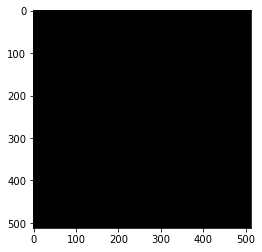

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

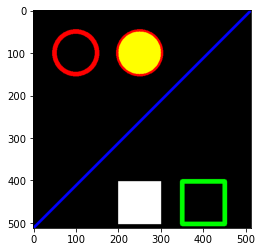

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
cv2.circle(blank_img,center=(100,100),radius=50,color=(255,0,0),thickness=10)
cv2.circle(blank_img,center=(250,100),radius=50,color=(255,0,0),thickness=10)
cv2.circle(blank_img,center=(250,100),radius=50,color=(255,255,0),thickness=-1)
cv2.line(blank_img,pt1=(0,512),pt2=(512,0),color=(0,0,255),thickness=5)
cv2.rectangle(blank_img,pt1=(200,502),pt2=(300,402),color=(255,255,255),thickness=-1)
cv2.rectangle(blank_img,pt1=(350,502),pt2=(450,402),color=(0,255,0),thickness=10)
plt.imshow(blank_img)

<class 'numpy.ndarray'>
200


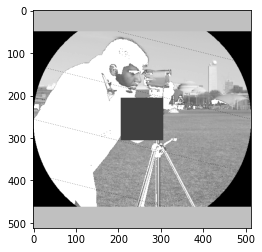

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data
camera = data.camera()
print(type(camera))
# Get the value of the pixel at the 10th row and 20th column
print(camera[10, 20])
mask = camera < 87
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
# Set the first 50 lines
camera[:50] = 192
# Set the last 50 lines
camera[-50:] = 192
x,y = np.ogrid[int(cnt_row)-50:int(cnt_row)+50, int(cnt_col)-50:int(cnt_col)+50]
# Set pixels
camera[x, y] = 64
plt.imshow(camera,cmap='gray')

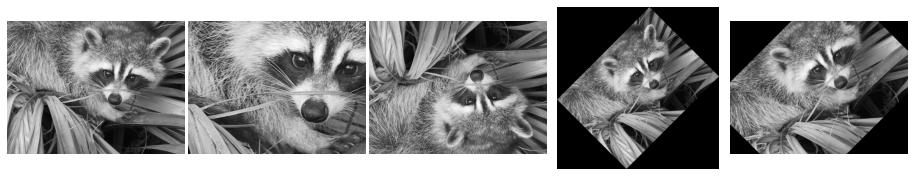

In [7]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
face = scipy.misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx//4:-lx//4, ly//4:-ly//4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.figure(figsize=(12.5, 2.5))
plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

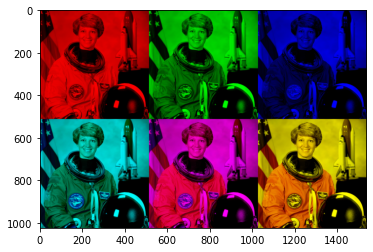

In [8]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline
img = data.astronaut()
img_R = img.copy()
img_R[:, :, (1, 2)] = 0
img_G = img.copy()
img_G[:, :, (0, 2)] = 0
img_B = img.copy()
img_B[:, :, (0, 1)] = 0
img_C = img_B+ img_G
img_M = img_R+img_B
img_Y = img_R + img_G
img_RGB = np.concatenate((img_R, img_G, img_B), axis=1)
img_CMY = np.concatenate((img_C, img_M, img_Y), axis=1)
img_new = np.concatenate((img_RGB, img_CMY), axis=0)
plt.imshow(img_new)
